In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_auc_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
# Check for imbalance

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [4]:
df.loc[(df['Class']==1)]
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [5]:
# Model
model=LogisticRegression()

# Random Over Sample Test

In [6]:
# Randomoversample test
ros = RandomOverSampler(random_state=0)
x_resample, y_resample = ros.fit_resample(x, y)
print((Counter(y_resample)))

Counter({0: 284315, 1: 284315})


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.3,random_state=420)

model.fit(x_train,y_train)

LogisticRegression()

In [8]:

pred=model.predict(x_test)
pred
print("Train Accuracy: ",model.score(x_train,y_train))
print("Test Accuracy: ",model.score(x_test,y_test))

Train Accuracy:  0.9165990438170942
Test Accuracy:  0.9165010639607477


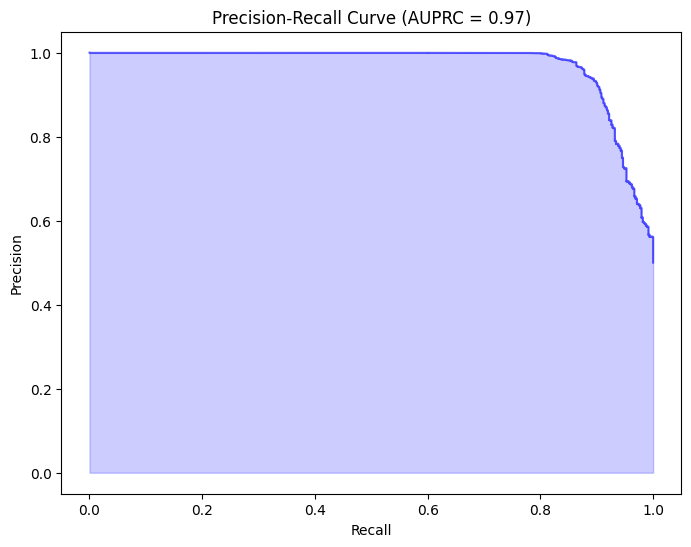

In [9]:
# Predictions
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.6, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUPRC = {average_precision:.2f})')
plt.show()

# Random Under Sample Test

In [10]:
# Randomundersample test
rus =RandomUnderSampler(random_state=0)
x_resample2, y_resample2 = rus.fit_resample(x, y)
print((Counter(y_resample2)))


Counter({0: 492, 1: 492})


In [11]:

x_train,x_test,y_train,y_test=train_test_split(x_resample2,y_resample2,test_size=0.2,random_state=420)
model.fit(x_train,y_train)

LogisticRegression()

In [12]:

pred2=model.predict(x_test)
pred2
print("Train Accuracy: ",model.score(x_train,y_train))
print("Test Accuracy: ",model.score(x_test,y_test))

Train Accuracy:  0.9377382465057179
Test Accuracy:  0.9543147208121827


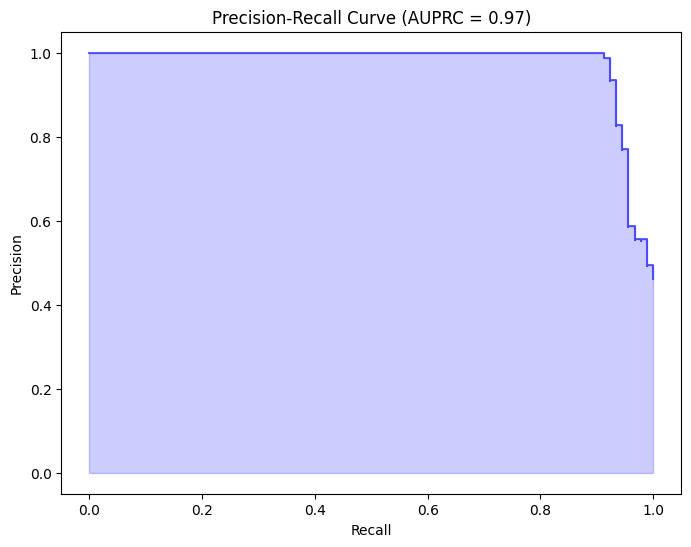

In [13]:
# Predictions
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.6, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUPRC = {average_precision:.2f})')
plt.show()

# SMOTE Test

In [14]:
# SMOTE test
sm=SMOTE()
x_resample3,y_resample3=sm.fit_resample(x,y)
print(Counter(y_resample3))


Counter({0: 284315, 1: 284315})


In [15]:

x_train,x_test,y_train,y_test=train_test_split(x_resample3,y_resample3,test_size=0.2,random_state=420)
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df = df.drop(columns='Class')

In [18]:
pred3=model.predict(df)
pred3
print("Train Accuracy: ",model.score(x_train,y_train))
print("Test Accuracy: ",model.score(x_test,y_test))

Train Accuracy:  0.9720094789230255
Test Accuracy:  0.9714577141550744


c:\Users\ByakkoMao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [19]:
# Initialize counters
total_transactions = len(pred3)
fraud_count = 0
non_fraud_count = 0

# Interpret predictions and count
for i, prediction in enumerate(pred3):
    if prediction == 1:
        fraud_count += 1
    else:
        non_fraud_count += 1

# Print summary results
print("\nSummary Results:")
print(f"Total Transactions: {total_transactions}")
print(f"Fraud Transactions: {fraud_count}")
print(f"Non-Fraud Transactions: {non_fraud_count}")


Summary Results:
Total Transactions: 284807
Fraud Transactions: 6141
Non-Fraud Transactions: 278666


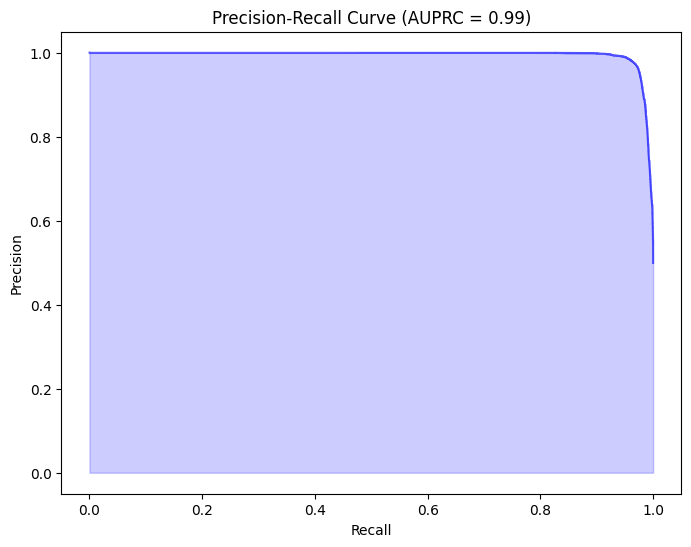

In [20]:
# Predictions
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.6, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUPRC = {average_precision:.2f})')
plt.show()
